In [4]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [5]:
img = cv2.imread('./images_dataset/lionel_messi/960.jpg')
img.shape

(620, 960, 3)

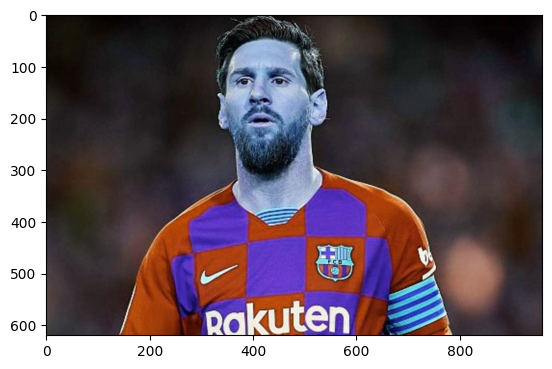

In [6]:
plt.imshow(img)

In [7]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(620, 960)

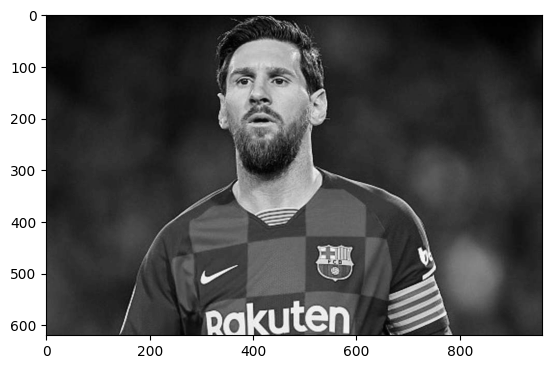

In [8]:
plt.imshow(gray,cmap = 'gray')

In [9]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade= cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray,1.3,5)
faces #returns an array with faces
# a face is a 4 tuple with (x coord, y coord, width, height)

array([[315,  43, 203, 203]])

In [10]:
(x,y,w,h) = faces[0] # there's only one face in faces meaning only one face in the image
x,y,w,h

(315, 43, 203, 203)

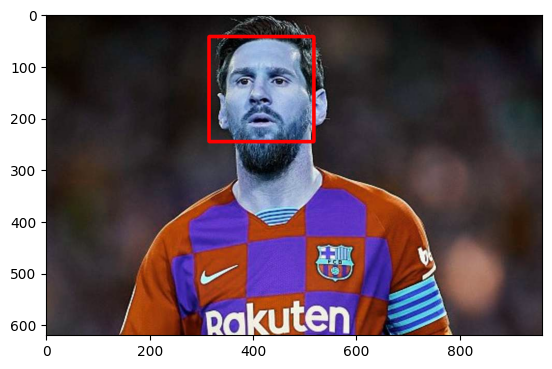

In [11]:
face_img = cv2.rectangle(img,(x,y),(x+w, y+h),(255,0,0),5)
# draw a rectangle around the face, red color
plt.imshow(face_img) 

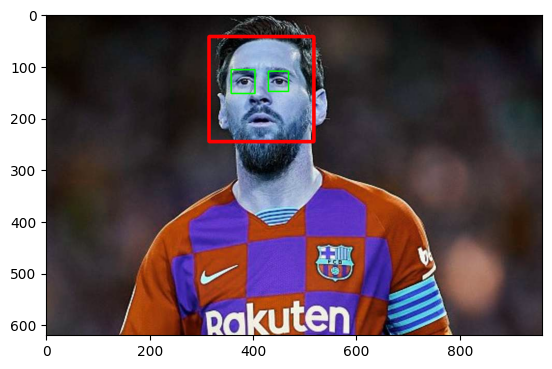

In [12]:
cv2.destroyAllWindows()

for (x,y,w,h) in faces:
    img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

plt.figure()
plt.imshow(face_img,cmap = 'gray')
plt.show()


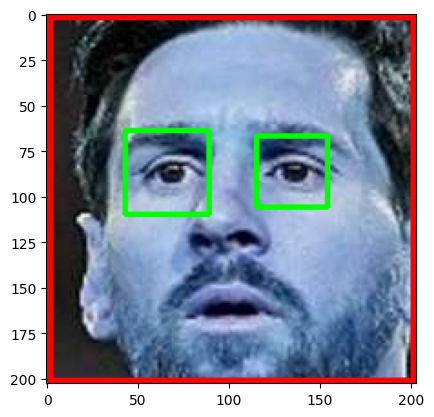

In [13]:
plt.imshow(roi_color, cmap = 'gray')

In [14]:
all_faces = []
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray,1.3,5)

    for (x,y,w,h) in faces:
        #img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            #for (ex,ey,ew,eh) in eyes:
                #cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
            return roi_color

   # return img 
    

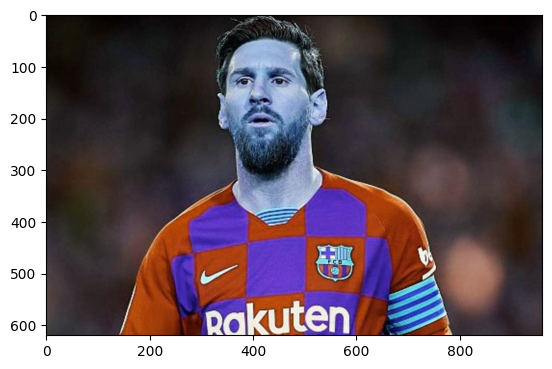

In [15]:
original_image = cv2.imread('./images_dataset/lionel_messi/960.jpg')
plt.imshow(original_image)

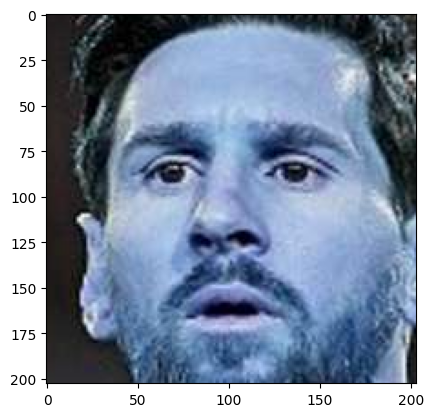

In [16]:
cropped_img = get_cropped_image_if_2_eyes('./images_dataset/lionel_messi/960.jpg')
plt.imshow(cropped_img)

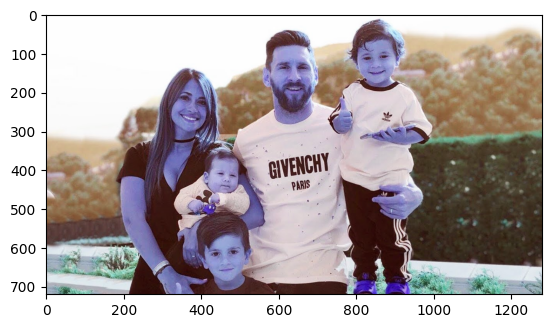

In [17]:
original_image = cv2.imread('./images_dataset/lionel_messi/maxresdefault.jpg')
plt.imshow(original_image)

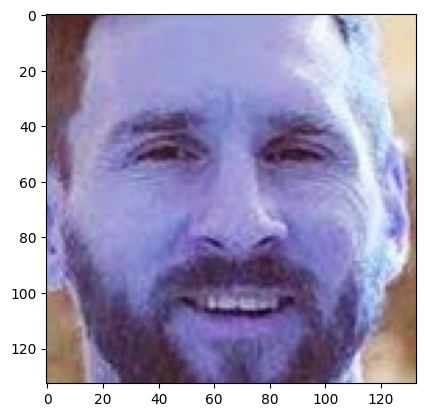

In [18]:
cropped_img = get_cropped_image_if_2_eyes('./images_dataset/lionel_messi/maxresdefault.jpg')
plt.imshow(cropped_img)


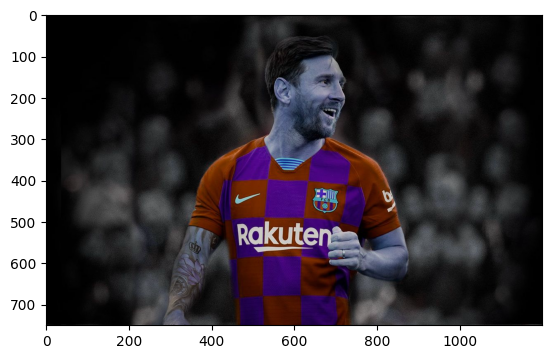

In [19]:
original_image = cv2.imread('./images_dataset/lionel_messi/10_MESSI_JUGADORS-WEB.jpg')
plt.imshow(original_image)

In [20]:
cropped_img = get_cropped_image_if_2_eyes('./images_dataset/lionel_messi/10_MESSI_JUGADORS-WEB.jpg')
cropped_img

In [21]:
path_to_data = "./images_dataset/"
path_to_cr_data = "./images_dataset/cropped/"

In [22]:
import os
img_dirs = []

for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [23]:
img_dirs # individual paths of each folder

['./images_dataset/lionel_messi',
 './images_dataset/maria_sharapova',
 './images_dataset/roger_federer',
 './images_dataset/serena_williams',
 './images_dataset/virat_kohli']

In [24]:
import shutil

#if folder exists... delete it
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)

#make folder
os.mkdir(path_to_cr_data)

In [25]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

#img_dirs contains path of all the image data folder 
for img_dir in img_dirs:
    count = 1
    #getting the name of the celebrities from the path
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []

    #scandir -> gives an iterator to go through the files in the directory
    for entry in os.scandir(img_dir):

        # for every file.. which is an image
        # we crop out the pictures with 2 eyes
        roi_color = get_cropped_image_if_2_eyes(entry.path)

        # if the image does have a face
        # save it in cropped folder
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            
            # if folder doesn't exists create 
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating folder: ",cropped_folder)
            
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name

            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1


Generating folder:  ./images_dataset/cropped/lionel_messi
Generating folder:  ./images_dataset/cropped/maria_sharapova
Generating folder:  ./images_dataset/cropped/roger_federer
Generating folder:  ./images_dataset/cropped/serena_williams
Generating folder:  ./images_dataset/cropped/virat_kohli


In [26]:
# manually remove the pictures that are not the corresponding celebrity

In [27]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

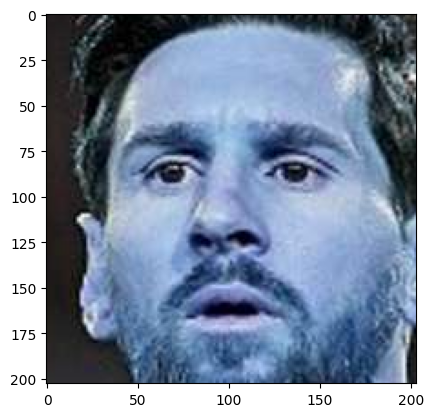

In [29]:
cropped_img = get_cropped_image_if_2_eyes('./images_dataset/lionel_messi/960.jpg')
plt.imshow(cropped_img)

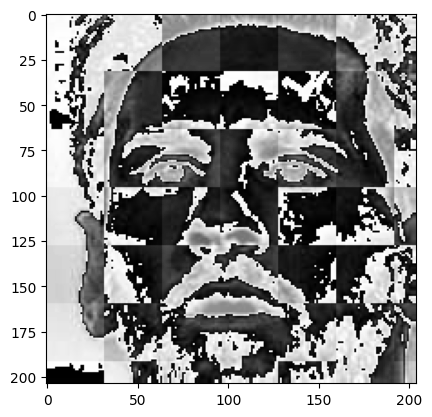

In [30]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [31]:
# input to the classifier
# vertically stacking of raw image and transformed image

celebrity_file_names_dict

{'lionel_messi': ['./images_dataset/cropped/lionel_messi/lionel_messi1.png',
  './images_dataset/cropped/lionel_messi/lionel_messi2.png',
  './images_dataset/cropped/lionel_messi/lionel_messi3.png',
  './images_dataset/cropped/lionel_messi/lionel_messi4.png',
  './images_dataset/cropped/lionel_messi/lionel_messi5.png',
  './images_dataset/cropped/lionel_messi/lionel_messi6.png',
  './images_dataset/cropped/lionel_messi/lionel_messi7.png',
  './images_dataset/cropped/lionel_messi/lionel_messi8.png',
  './images_dataset/cropped/lionel_messi/lionel_messi9.png',
  './images_dataset/cropped/lionel_messi/lionel_messi10.png',
  './images_dataset/cropped/lionel_messi/lionel_messi11.png',
  './images_dataset/cropped/lionel_messi/lionel_messi12.png',
  './images_dataset/cropped/lionel_messi/lionel_messi13.png',
  './images_dataset/cropped/lionel_messi/lionel_messi14.png',
  './images_dataset/cropped/lionel_messi/lionel_messi15.png',
  './images_dataset/cropped/lionel_messi/lionel_messi16.png',
 

In [34]:
class_dict = {}
count = 0

for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1

class_dict

{'lionel_messi': 0,
 'maria_sharapova': 1,
 'roger_federer': 2,
 'serena_williams': 3,
 'virat_kohli': 4}

In [37]:
X = []
Y = []

for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        
        if img is None:
            continue
        
        #all the images must be of same size
        scalled_raw_img = cv2.resize(img,(32,32))
        
        #getting tranformed image
        img_har = w2d(img,'db1',5)

        #scale the tranformed image
        scalled_img_har = cv2.resize(img_har,(32,32))
        
        #stacking the image
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))

        #creating x,y - training data
        X.append(combined_img)
        Y.append(class_dict[celebrity_name])



In [40]:
len(X)

170

In [42]:
len(X[0])

# 32*32*3 + 32*32 = 4906

4096

In [43]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(170, 4096)

Training the model

In [45]:
# USING SVM

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X , Y, test_size = 20)

pipe = Pipeline([('scaler',StandardScaler()), ('svc',SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test,y_test)

0.85

In [67]:
print(classification_report(y_test,pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.67      0.80         6
           2       1.00      0.67      0.80         3
           3       0.80      1.00      0.89         4
           4       0.75      1.00      0.86         3

    accuracy                           0.85        20
   macro avg       0.87      0.87      0.85        20
weighted avg       0.88      0.85      0.84        20



In [68]:
#USING GRIDSEARCHCV

#must knwo about gridsearchcv
#must know about cross validation
#must know pipeline

from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [71]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [72]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df


,model,best_score,best_params
0,svm,0.846667,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.700000,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.853333,{'logisticregression__C': 1}


In [75]:
#the score above are from validation set
#the score below is on test set

best_estimators['svm'].score(X_test,y_test)

0.95

In [77]:
best_estimators['random_forest'].score(X_test,y_test)

0.65

In [78]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.9

In [80]:
best_clf = best_estimators['svm'] 

In [81]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[4, 0, 0, 0, 0],
       [0, 5, 0, 1, 0],
       [0, 0, 3, 0, 0],
       [0, 0, 0, 4, 0],
       [0, 0, 0, 0, 3]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

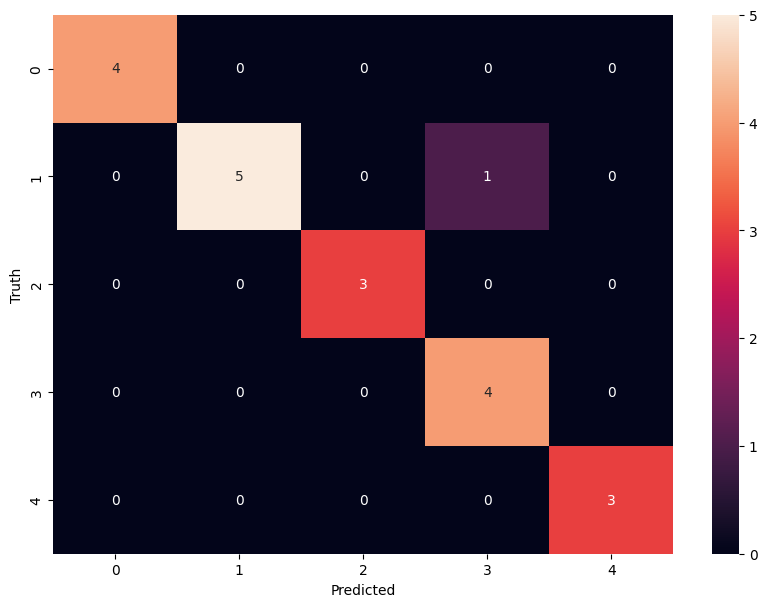

In [82]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [83]:
import joblib

joblib.dump(best_clf,'saved_model.pkl')

['saved_model.pkl']

In [85]:
import json

with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))